# 第 2 章 认识网络结构数据

导入库

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from modules.tools import graph_info

# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']

使用networkx库创建网络

In [2]:
# 创建空网络
g1 = nx.Graph()
# 查看网络
graph_info(g1)

Graph with 0 nodes and 0 edges.
Graph type:      undirected unweighted 


In [3]:
# 添加6个节点
g1.add_nodes_from(range(1, 7))
# 查看网络
graph_info(g1)

Graph with 6 nodes and 0 edges.
Graph type:      undirected unweighted 
Node attributes: 


In [4]:
# 添加连边
g2 = g1.copy()
g2.add_edges_from([(1, 2), (2, 3), (1, 3), (3, 4), (4, 5), (1, 5), (3, 6), (2, 6), (5, 6)])
# 查看网络
graph_info(g2)

Graph with 6 nodes and 9 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[0] 1 -- 2	[1] 1 -- 3	[2] 1 -- 5	[3] 2 -- 3	[4] 2 -- 6	[5] 3 -- 4	[6] 3 -- 6
[7] 4 -- 5	[8] 5 -- 6	

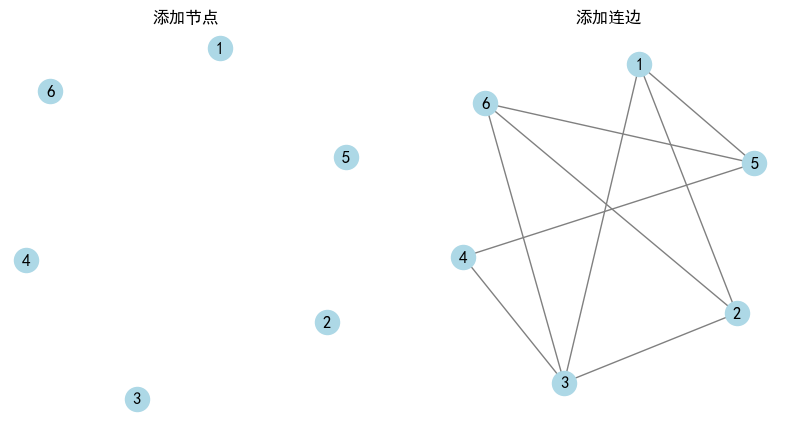

In [5]:
# 将画布分成一行两列
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# 绘制网络结构图
pos = nx.spring_layout(g1, seed=42)
ax[0].set_title('添加节点')
nx.draw(g1, pos, with_labels=True, node_color='lightblue', ax=ax[0])
ax[1].set_title('添加连边')
nx.draw(g2, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax[1])
plt.show()

利用边数据构建（有向、无向）网络

In [6]:
# 创建无向网络
g1 = nx.read_edgelist('../../Data/karate.txt')
# 查看网络
graph_info(g1)

Graph with 34 nodes and 78 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[0] 2  -- 1 	[1] 2  -- 3 	[2] 2  -- 4 	[3] 2  -- 8 	[4] 2  -- 14	[5] 2  -- 18
[6] 2  -- 20	[7] 2  -- 22	[8] 2  -- 31	[9] 1  -- 3 	[10] 1  -- 4 	[11] 1  -- 5 
[12] 1  -- 6 	[13] 1  -- 7 	[14] 1  -- 8 	[15] 1  -- 9 	[16] 1  -- 11
[17] 1  -- 12	[18] 1  -- 13	[19] 1  -- 14	[20] 1  -- 18	[21] 1  -- 20
[22] 1  -- 22	[23] 1  -- 32	[24] 3  -- 4 	[25] 3  -- 8 	[26] 3  -- 9 
[27] 3  -- 10	[28] 3  -- 14	[29] 3  -- 28	[30] 3  -- 29	[31] 3  -- 33
...


In [7]:
# 创建有向网络
g2 = nx.read_edgelist('../../Data/karate.txt', create_using=nx.DiGraph)
# 查看网络
graph_info(g2)

Graph with 34 nodes and 78 edges.
Graph type:      directed unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[0] 2  -> 1 	[1] 3  -> 1 	[2] 3  -> 2 	[3] 4  -> 1 	[4] 4  -> 2 	[5] 4  -> 3 
[6] 5  -> 1 	[7] 6  -> 1 	[8] 7  -> 1 	[9] 7  -> 5 	[10] 7  -> 6 	[11] 8  -> 1 
[12] 8  -> 2 	[13] 8  -> 3 	[14] 8  -> 4 	[15] 9  -> 1 	[16] 9  -> 3 
[17] 11 -> 1 	[18] 11 -> 5 	[19] 11 -> 6 	[20] 12 -> 1 	[21] 13 -> 1 
[22] 13 -> 4 	[23] 14 -> 1 	[24] 14 -> 2 	[25] 14 -> 3 	[26] 14 -> 4 
[27] 18 -> 1 	[28] 18 -> 2 	[29] 20 -> 1 	[30] 20 -> 2 	[31] 22 -> 1 
...


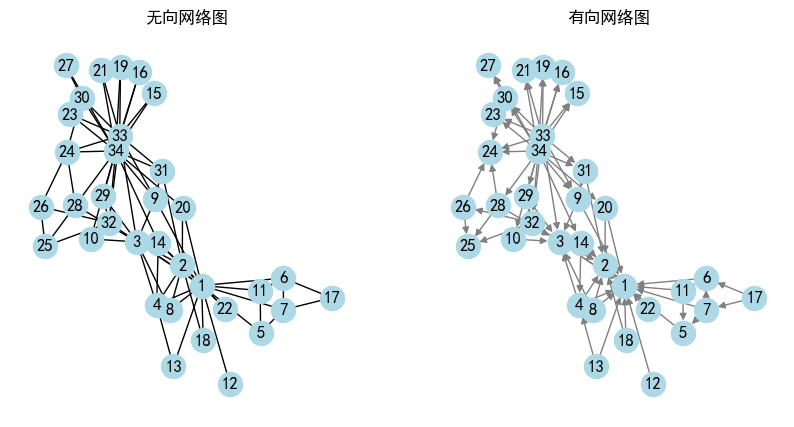

In [8]:
# 将画布分成一行两列
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# 绘制网络结构图
pos = nx.spring_layout(g1, seed=42)
ax[0].set_title('无向网络图')
nx.draw(g1, pos, with_labels=True, node_color='lightblue', ax=ax[0])
ax[1].set_title('有向网络图')
nx.draw(g2, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax[1])
plt.show()

利用邻接矩阵构建（有向、无向）网络

In [9]:
# 创建边数据
a = [(i, j) for i, j in zip(range(1, 11), [2, 3, 4, 7, 3, 2, 1, 9, 7, 6])]
# 根据边数据构造网络
g_a = nx.Graph(a)
# 将网络转换为邻接矩阵
adj = nx.adjacency_matrix(g_a).todense()
# 输出邻接矩阵
adj

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [10]:
# 创建网络
g3 = nx.Graph(adj)
# 查看网络
graph_info(g3)

Graph with 10 nodes and 10 edges.
Graph type:      undirected weighted 
Node attributes: 
Edge attributes: weight 
Edge list:
[0] 0 -- 1	[1] 0 -- 4	[2] 1 -- 2	[3] 1 -- 6	[4] 2 -- 3	[5] 2 -- 5	[6] 3 -- 4
[7] 4 -- 8	[8] 6 -- 9	[9] 7 -- 8	

In [11]:
# 创建网络
g4 = nx.DiGraph(adj)
# 查看网络
graph_info(g4)

Graph with 10 nodes and 20 edges.
Graph type:      directed weighted 
Node attributes: 
Edge attributes: weight 
Edge list:
[0] 0 -> 1	[1] 0 -> 4	[2] 1 -> 0	[3] 1 -> 2	[4] 1 -> 6	[5] 2 -> 1	[6] 2 -> 3
[7] 2 -> 5	[8] 3 -> 2	[9] 3 -> 4	[10] 4 -> 0	[11] 4 -> 3	[12] 4 -> 8
[13] 5 -> 2	[14] 6 -> 1	[15] 6 -> 9	[16] 7 -> 8	[17] 8 -> 4	[18] 8 -> 7
[19] 9 -> 6	

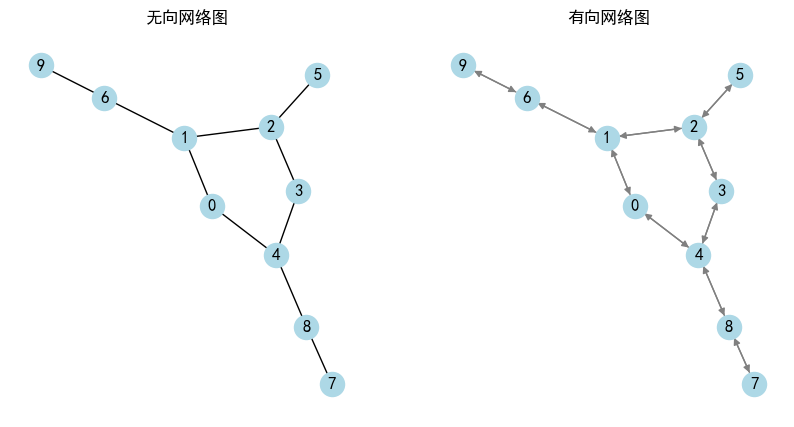

In [12]:
# 将画布分成一行两列
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# 绘制网络结构图
pos = nx.spring_layout(g3, seed=49)
ax[0].set_title('无向网络图')
nx.draw(g3, pos, with_labels=True, node_color='lightblue', ax=ax[0])
ax[1].set_title('有向网络图')
nx.draw(g4, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax[1])
plt.show()